<a href="https://colab.research.google.com/github/Rupa209/SeoulBikeSharingDemandAnalysis/blob/main/Copy_of_Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project_ipynb_(invidual_notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>(**Individual** **notebook**)

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules**

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

**Mount the drive and import the datset**

In [ ]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')

# **Understand More About The Data**

**summary of data**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Getting the shape of dataset with rows and columns
print(df.shape)

(8760, 14)


In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**This Dataset contains 8760 lines and 14 columns.**

**In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.**

# **Features description**

**Breakdown of Our Features:**

**Date :** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count :** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

# **Preprocessing the dataset**

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first



**Missing values**

In [ ]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

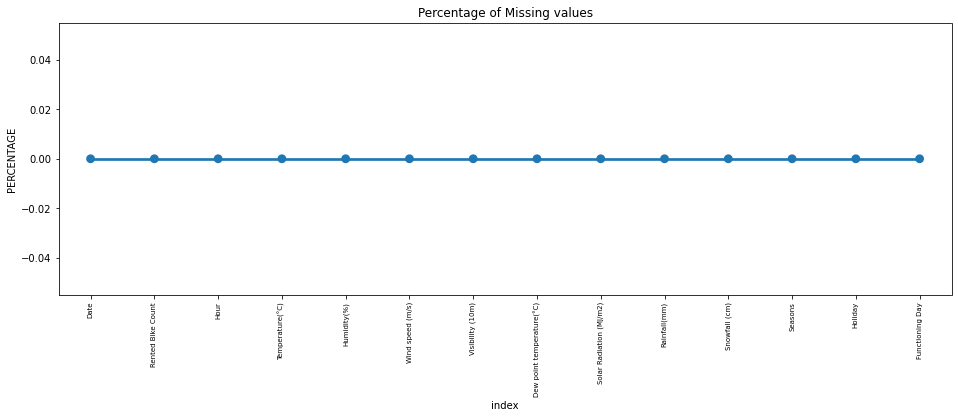

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

As we can see above there are no missing value presents thankfully

# **Duplicate values**

**Why is it important to remove duplicate records from my data?**

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0



*   In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.
*   Some of the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it don't affect our end results.



**Changing column name**

In [ ]:
#Rename the complex columns name
df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.

**Breaking date column**

In [ ]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df = df.drop(columns=['Date','day','year'],axis=1)



*   So we convert the "date" column into 3 different column i.e "year","month","day"
*  The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it 
*  The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column  



In [ ]:
df.head()


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

**Changing data type**

As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [ ]:
df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [ ]:
#Change the int64 column into catagory column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df[col] =df[col].astype('category')

In [ ]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

# **Univariate Analysis**

**Why do you do univariate analysis?**

The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

# **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**

we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.

**Month**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

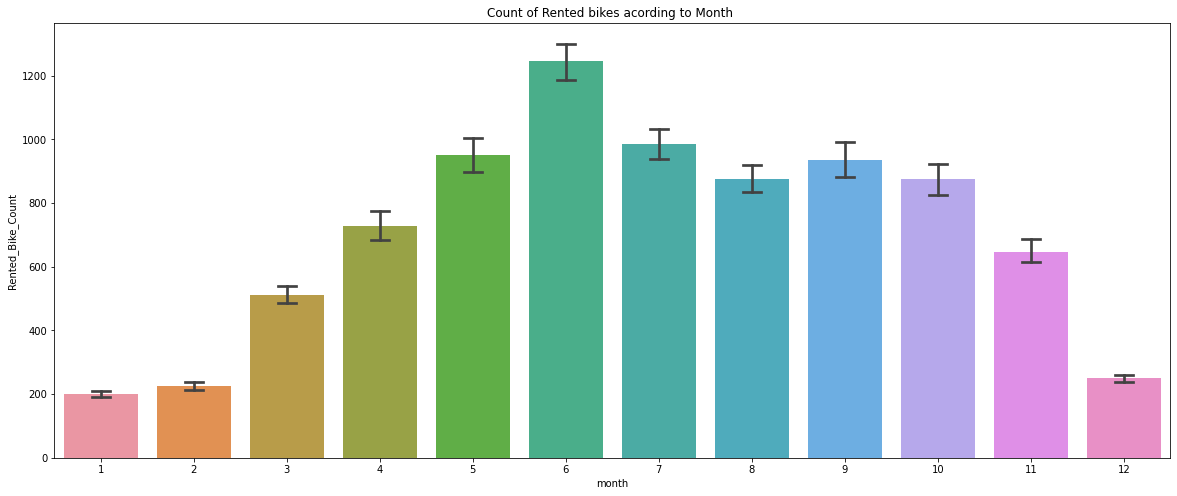

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (20,8))
sns.barplot(data = df,x ='month',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Month ')

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

**weekdays_weekend**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

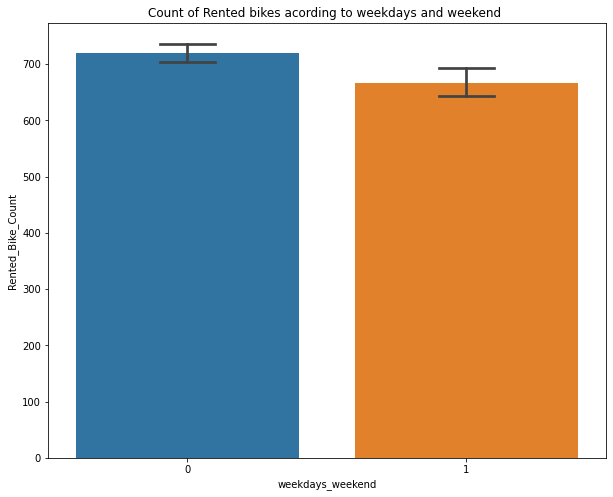

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (10,8))
sns.barplot(data = df,x='weekdays_weekend',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented_bikes_acording to weekdays_weekend ')]

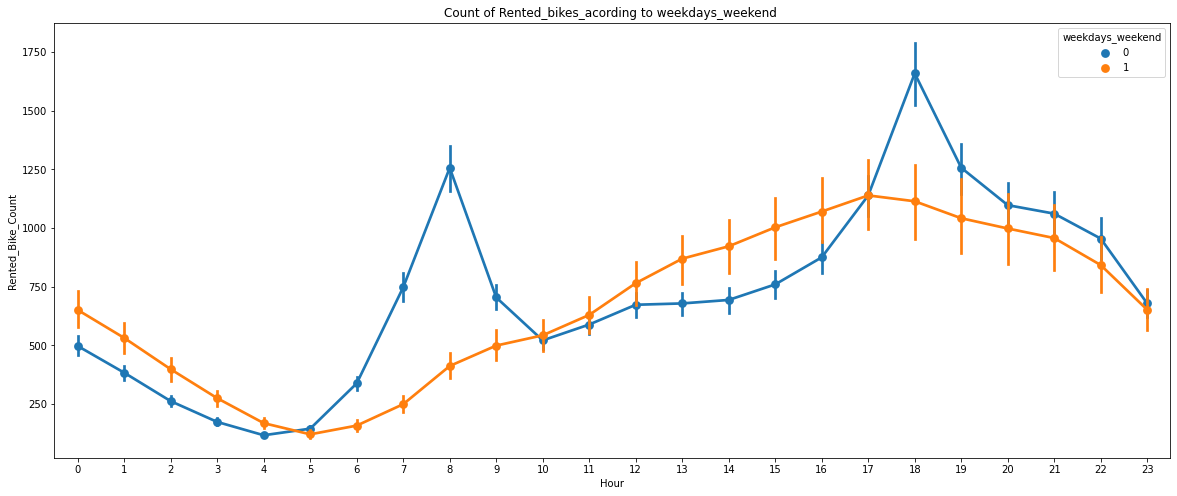

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = df,x='Hour',y='Rented_Bike_Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented_bikes_acording to weekdays_weekend ')

**From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.**


*   Peak Time are 7 am to 9 am and 5 pm to 7 pm* *The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.



**Hour**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

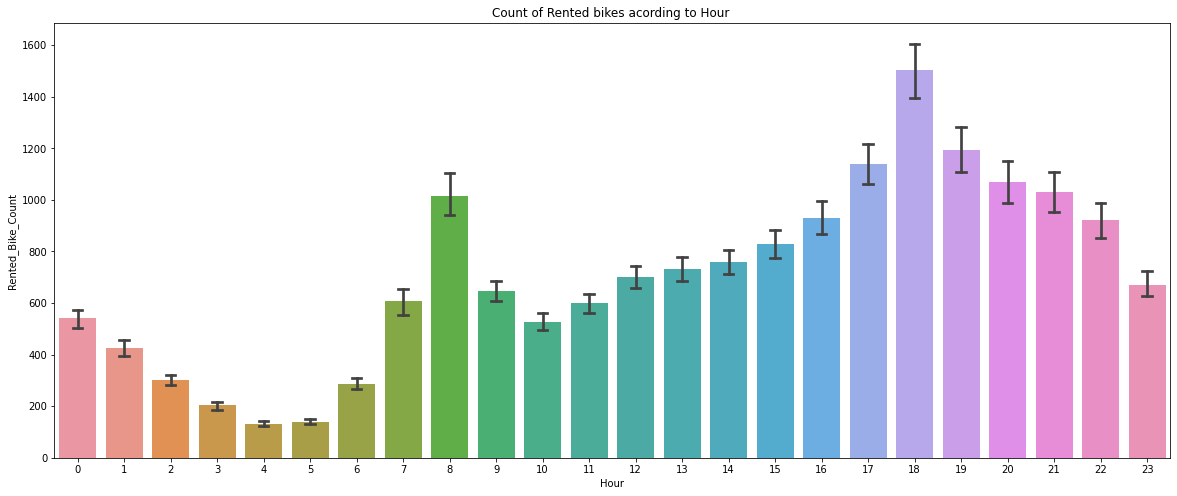

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (20,8))
sns.barplot(data = df,x = 'Hour',y='Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title='Count of Rented bikes acording to Hour ')



*   In the above plot which shows the use of rented bike according the hours and the data are from all over the year.
*   generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.



**Functioning Day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

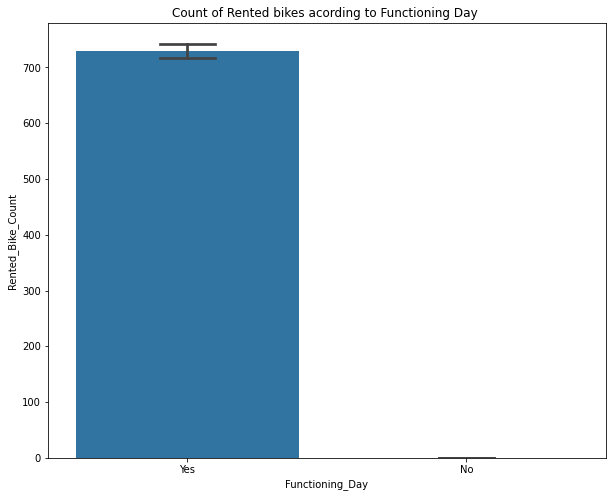

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (10,8))
sns.barplot(data = df,x = 'Functioning_Day',y='Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

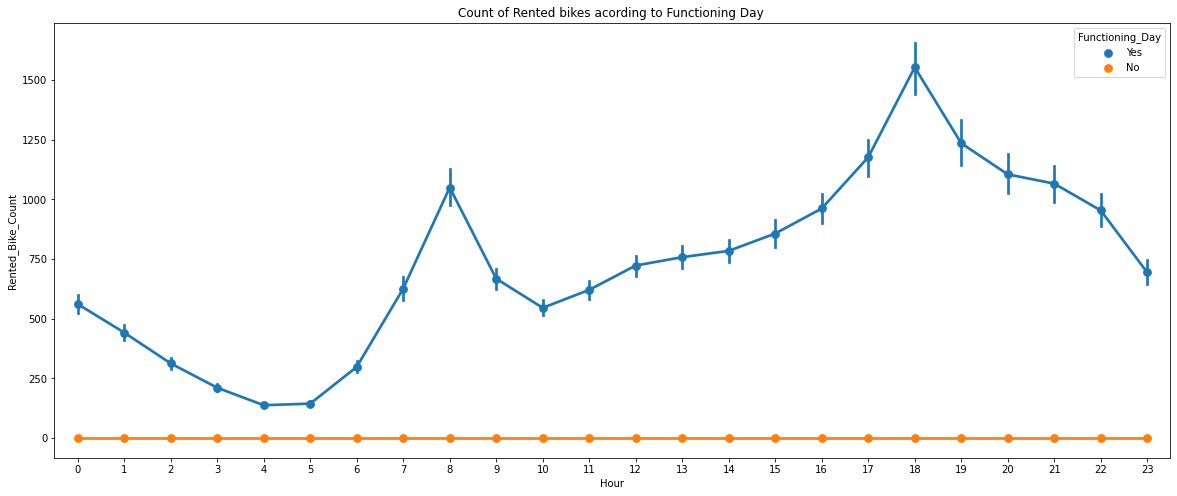

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = df,x='Hour',y = 'Rented_Bike_Count',hue='Functioning_Day',ax = ax)
ax.set(title = 'Count of Rented bikes acording to Functioning Day ')



*   In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,
*   Peoples dont use reneted bikes in no functioning day.



**Seasons**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

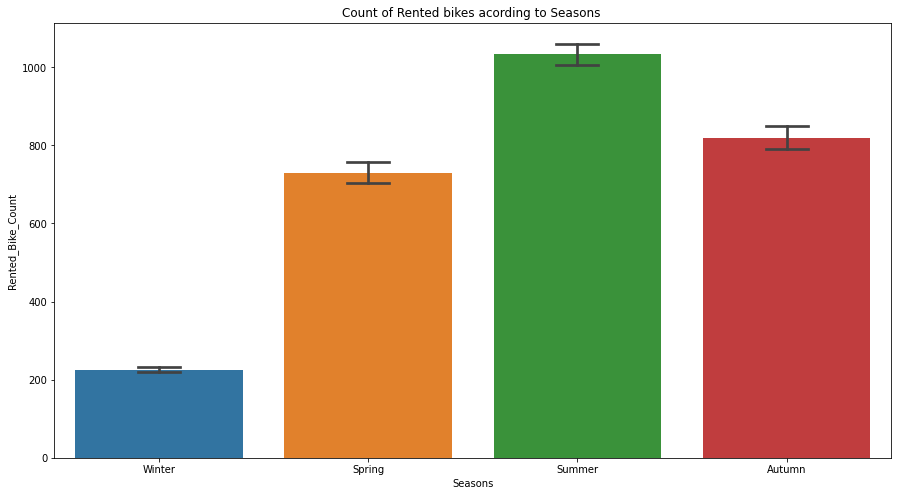

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

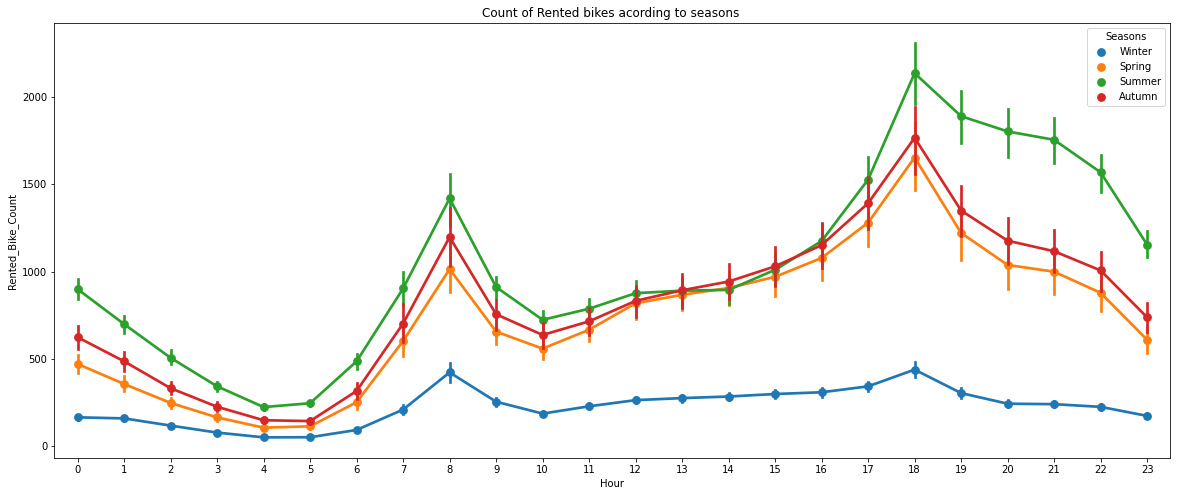

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')



*   In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that
*   In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.
*  In winter season the use of rented bike is very low because of snowfall. 



**Holiday**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

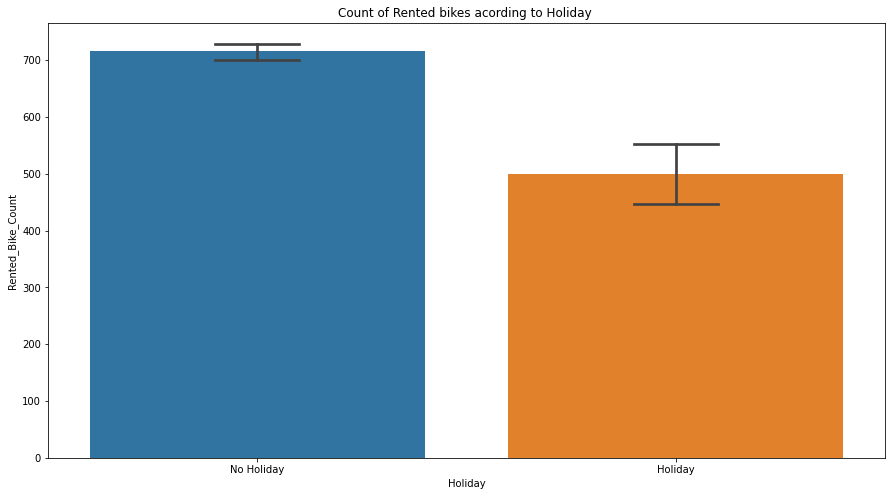

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

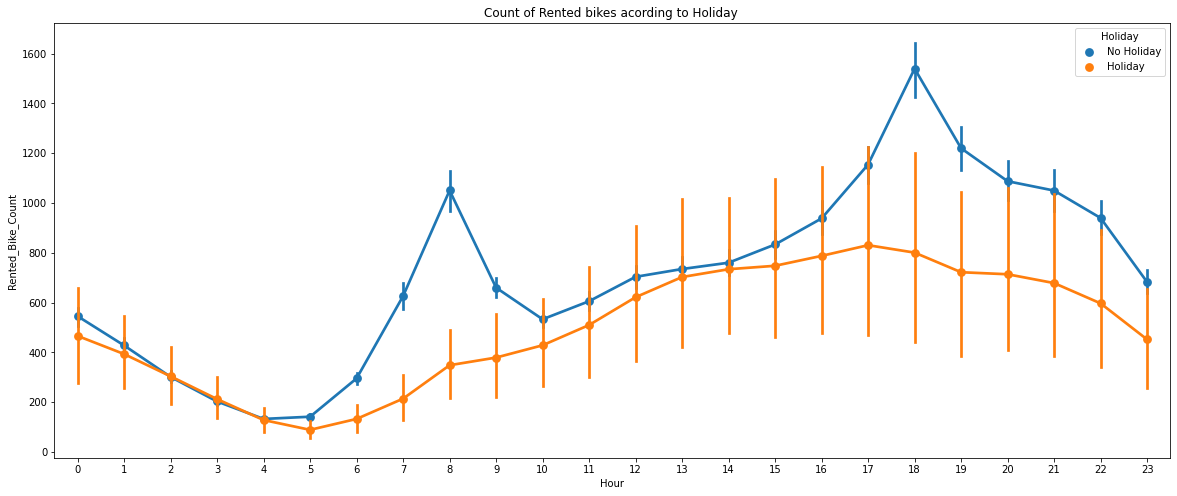

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')



*   In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that
*   plot shows that in holiday people uses the rented bike from 2pm-8pm
  



# **Analyze of Numerical variables**

**What is Numerical Data**

Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

**Analyze of Numerical variables distplots**

In [ ]:
#assign the numerical coulmn to variable
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

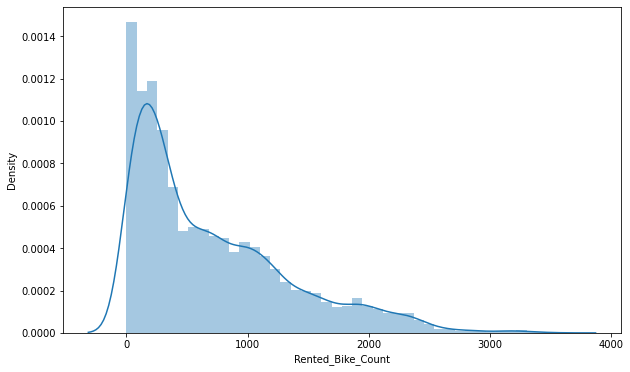

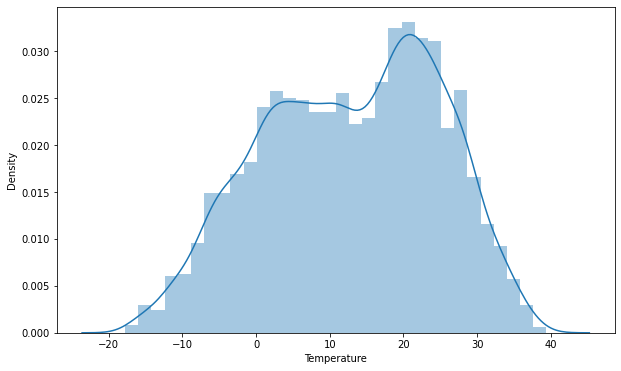

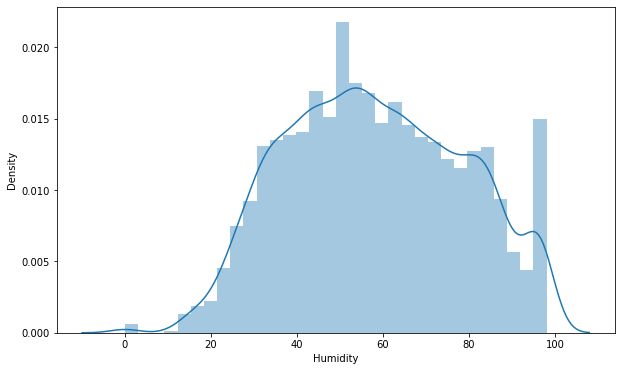

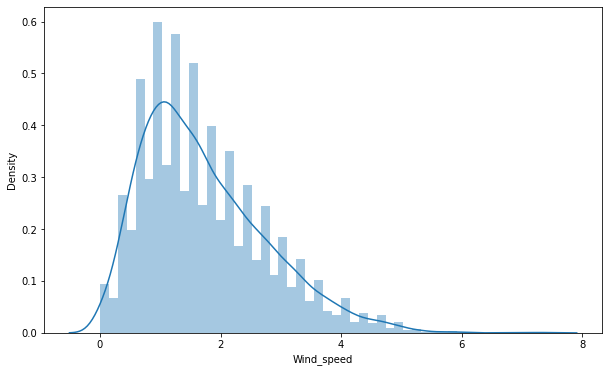

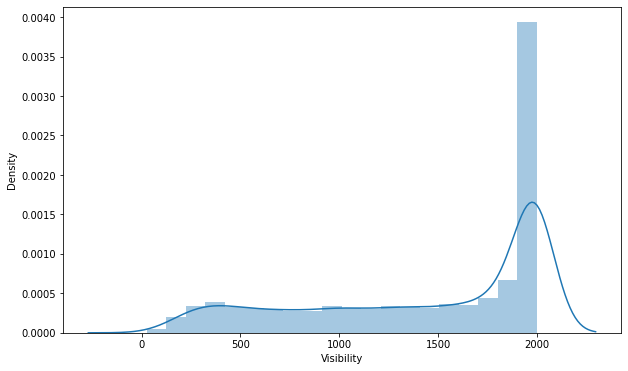

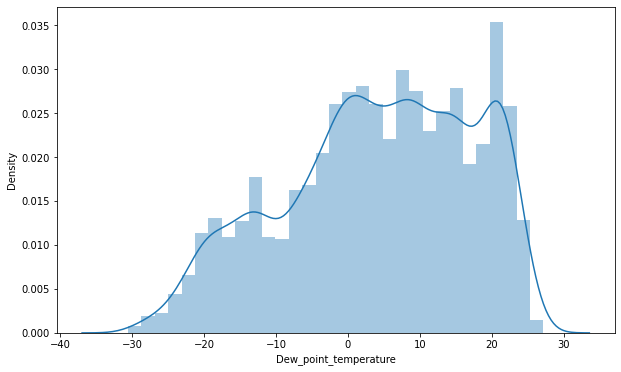

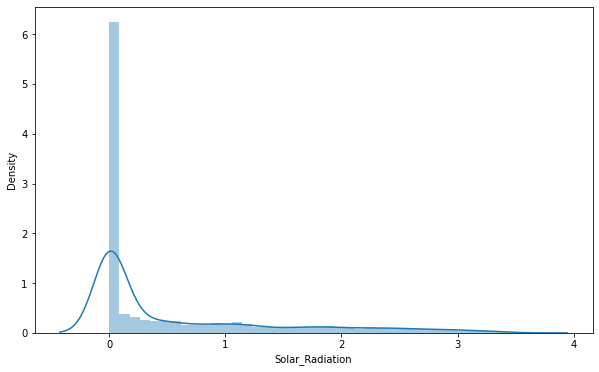

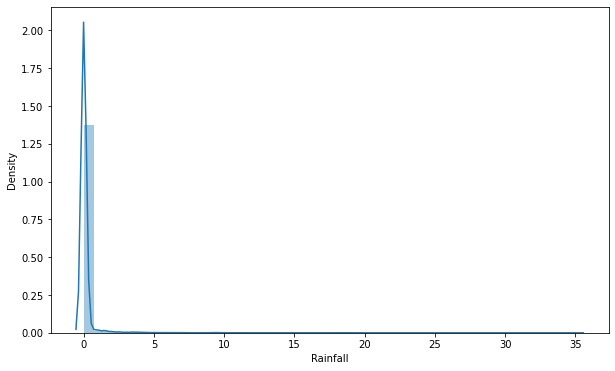

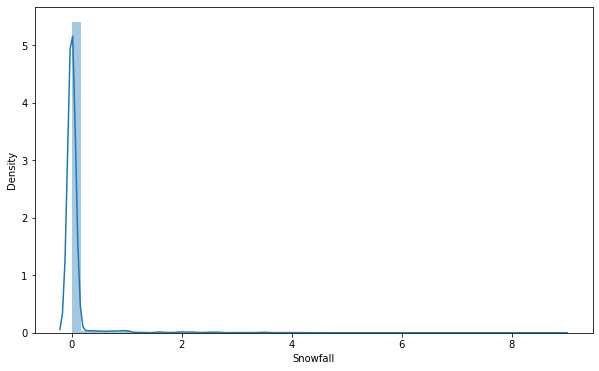

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

**Regression plot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

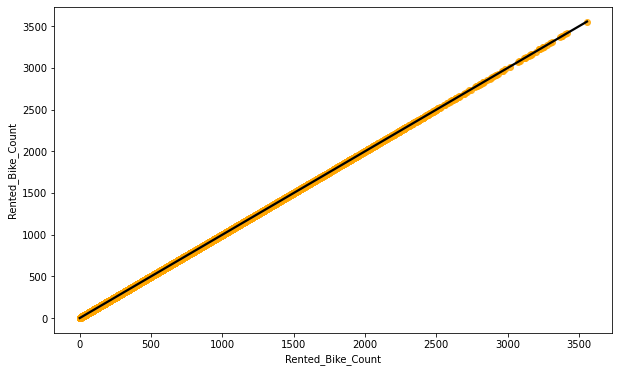

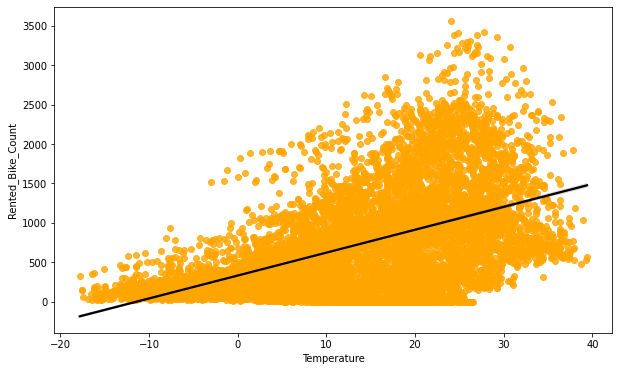

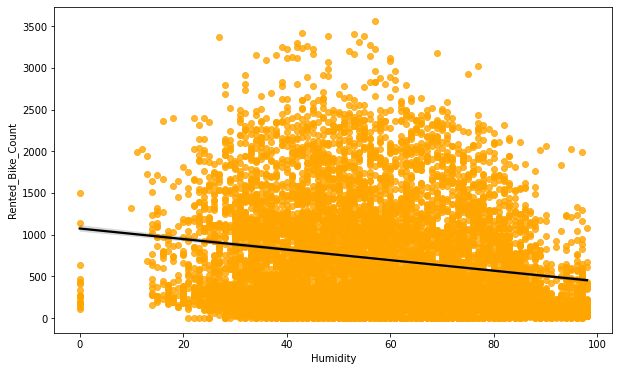

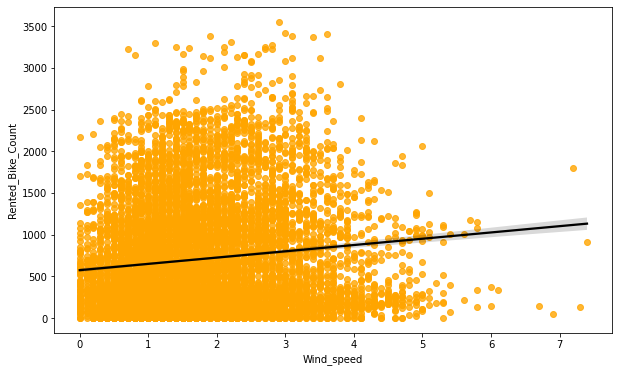

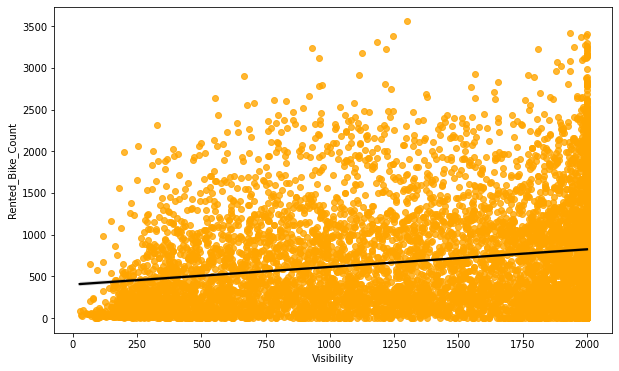

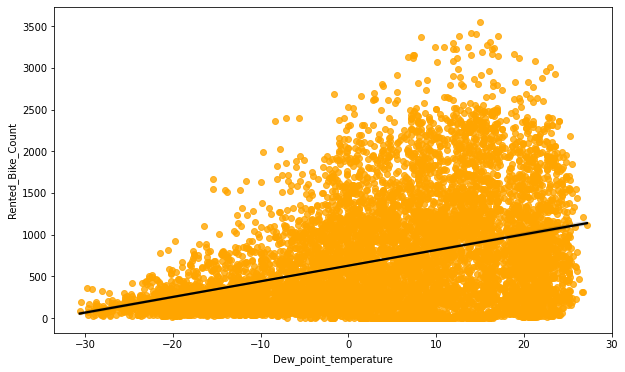

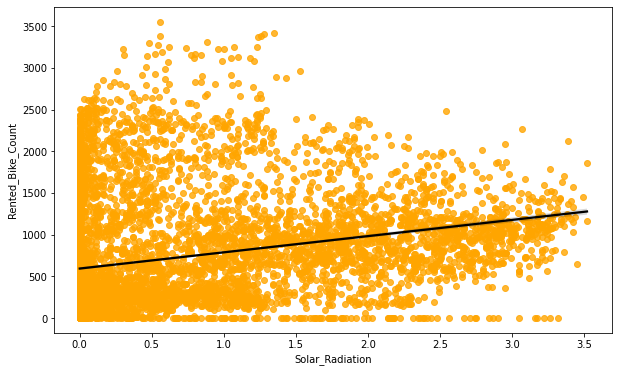

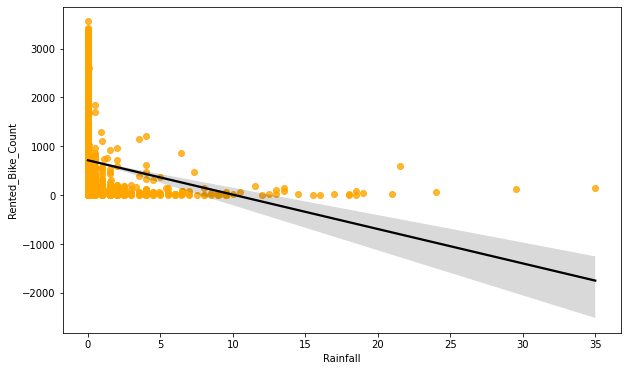

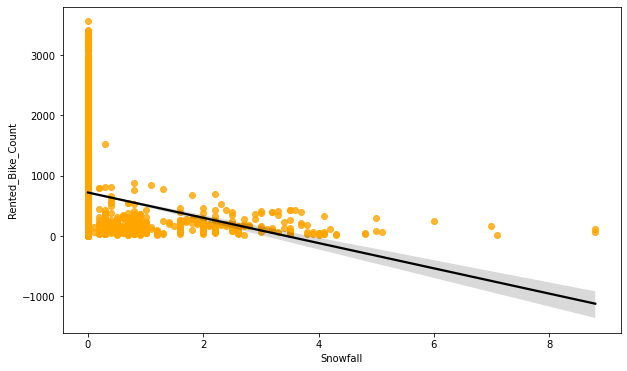

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})



*   From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.
*  which means the rented bike count increases with increase of these features. 
*   'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.


# **Normalise Rented_Bike_Count column data**

The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data

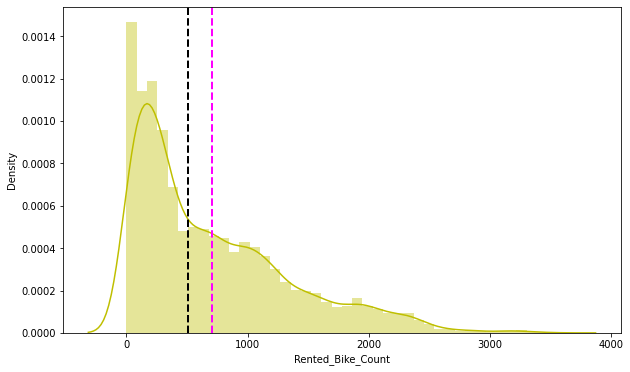

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal

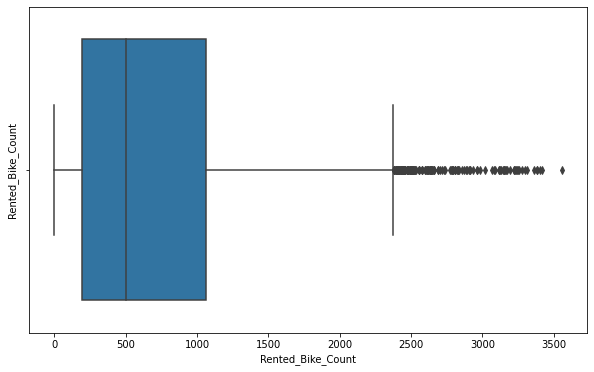

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

The above boxplot shows that we have detect outliers in Rented Bike Count column

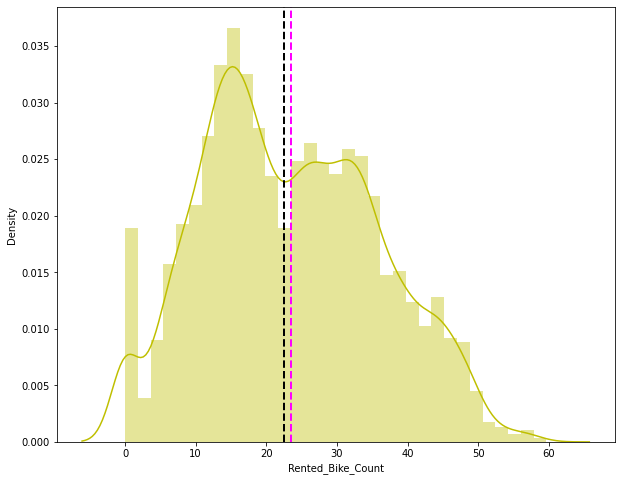

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

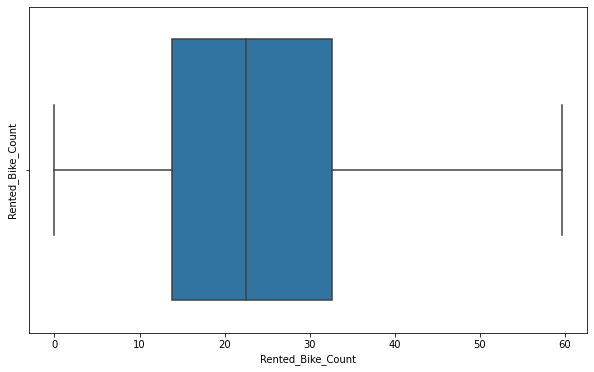

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

In [ ]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# **Checking of Correlation between variables**

**Checking in OLS Model**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

**Heatmap**

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables

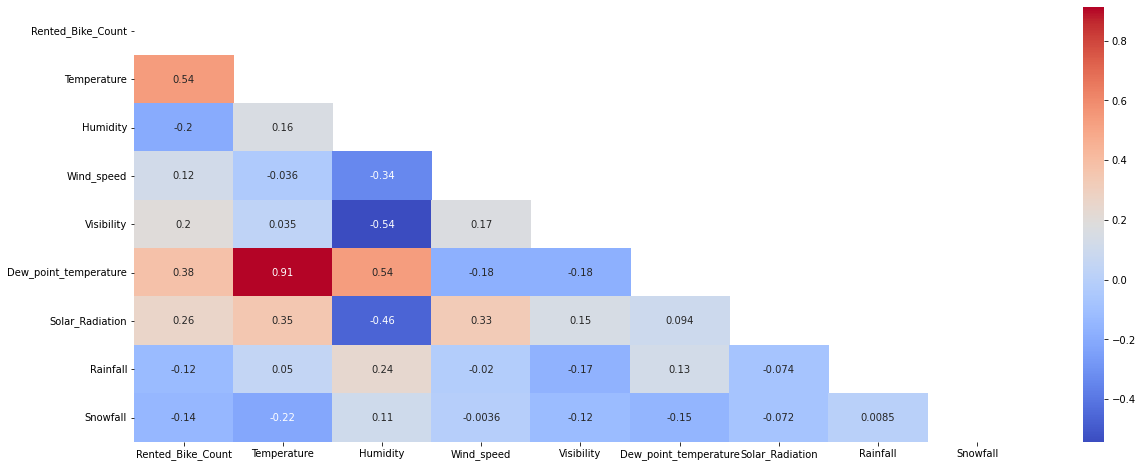

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')


correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

**Create the dummy variables**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [ ]:
#Assign all catagoriacla features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

**one hot encoding**

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.



In [ ]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


# **Model Training**

**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 48)
(2190, 48)


In [ ]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weekdays_weekend_1'],
      dtype='object')

# **LINEAR REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7739500178860265

In [ ]:
#check the coefficeint
reg.coef_

array([ 1.00716430e-01, -2.37171095e-01, -3.83514579e-02,  9.89292762e-04,
        4.48649754e-01,  1.10233082e+00, -1.42620210e+00,  1.97988853e-02,
       -2.02001246e+00, -4.95378959e+00, -7.24401536e+00, -9.50159767e+00,
       -9.04615325e+00, -3.99911519e+00,  2.25436221e+00,  7.48518526e+00,
        1.08263864e+00, -3.47160329e+00, -3.60398174e+00, -2.84952971e+00,
       -2.96884880e+00, -3.08067403e+00, -1.73357996e+00,  3.00563252e-01,
        4.01127439e+00,  1.03848640e+01,  6.87256706e+00,  6.09265423e+00,
        6.19988288e+00,  5.03861312e+00,  1.45957498e+00, -4.03596659e-01,
       -1.45360507e+00, -4.68852171e+00,  3.49141047e+00,  2.83549564e+01,
       -6.62050082e-01, -1.51944633e+00, -4.35688691e-01,  1.55153836e+00,
        4.42646814e+00, -1.82821742e+00, -4.05185579e+00,  4.72139757e-01,
        3.29429867e+00,  2.77928502e+00,  2.13133779e+00, -1.34812601e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.80959018818959
RMSE : 5.8999652700833405
MAE : 4.444157962699087
R2 : 0.7739500178860265
Adjusted R2 : 0.7688821060964558


Looks like our r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.08548027836937
RMSE : 5.75199793796637
MAE : 4.373223624494954
R2 : 0.7905536900393838
Adjusted R2 : 0.7858580231182677


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

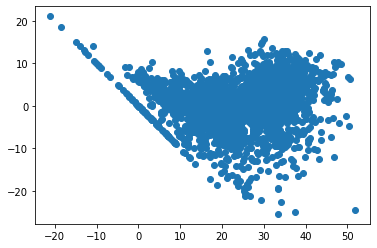

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

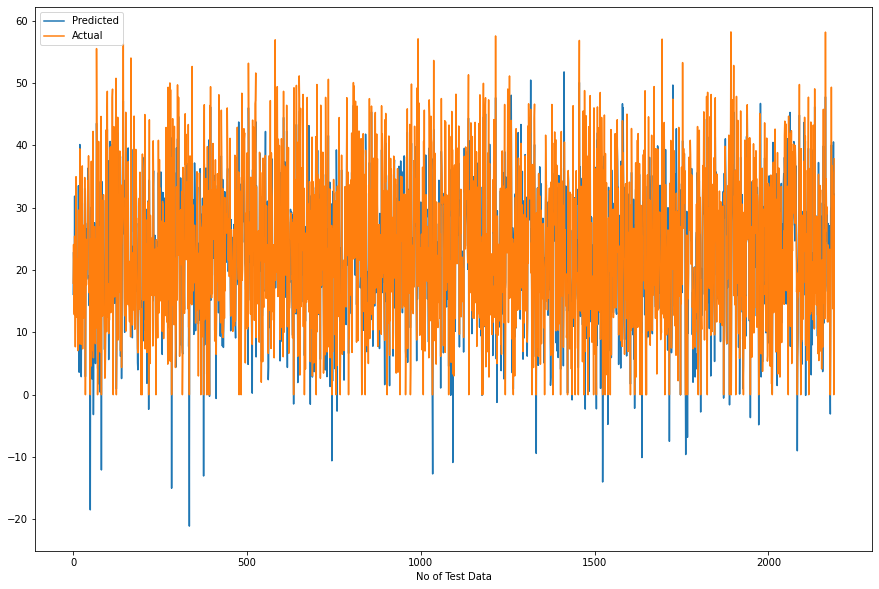

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.387939387361117 0.40607960378573027


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.45820496549345
RMSE : 9.563378323871405
MAE : 7.242373211166085
R2 : 0.40607960378573027
Adjusted R2 : 0.392764246934593


Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.68501360772724
RMSE : 9.832853787569876
MAE : 7.4419572551489805
R2 : 0.387939387361117
Adjusted R2 : 0.3742173371945283


The r2_score for the test set is 0.38. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

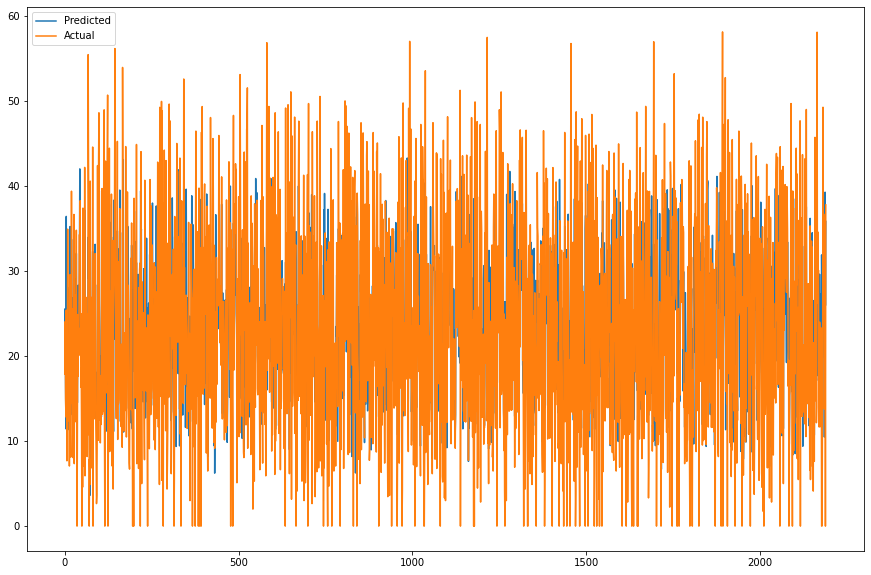

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

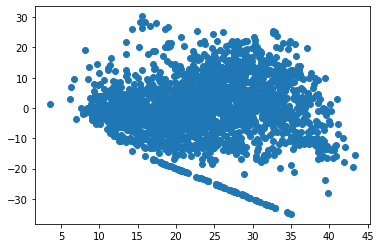

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

**RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7739499413712558

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.809601970751054
RMSE : 5.899966268611292
MAE : 4.444230453823098
R2 : 0.7739499413712558
Adjusted R2 : 0.7688820278662676


Looks like our r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.08692557699116
RMSE : 5.752123571081481
MAE : 4.373424447304692
R2 : 0.7905445406342496
Adjusted R2 : 0.785848668588684


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

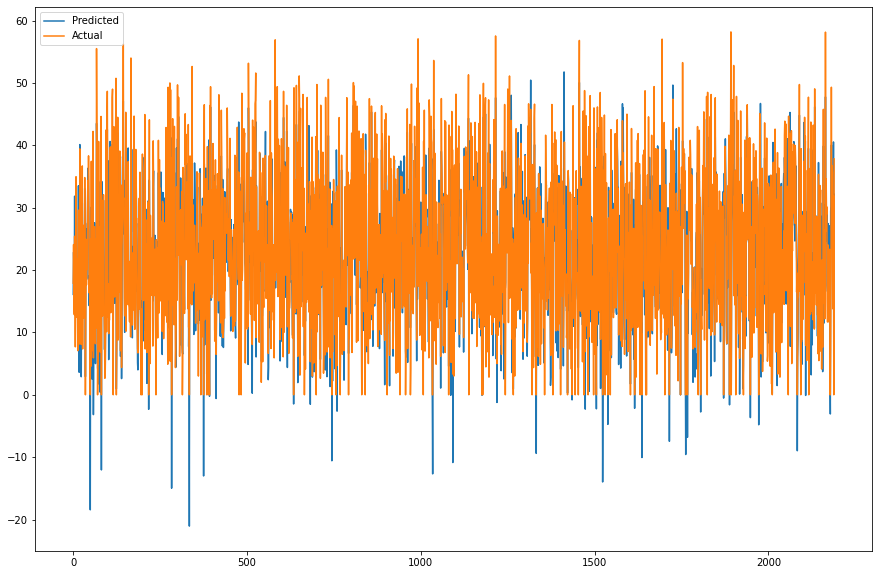

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

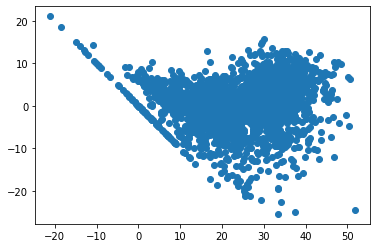

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.5403750389581118
MSE : 70.77795974371686
RMSE : 8.412963790705204
MAE : 5.903503306623539
R2 : 0.5403750389581118
Adjusted R2 : 0.5300705092383498


Looks like our r2 score value is 0.69 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 84.9145728466978
RMSE : 9.214910354783589
MAE : 6.443874216822164
R2 : 0.46245169195109737
Adjusted R2 : 0.4504001651942794


The r2_score for the test set is 0.66. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

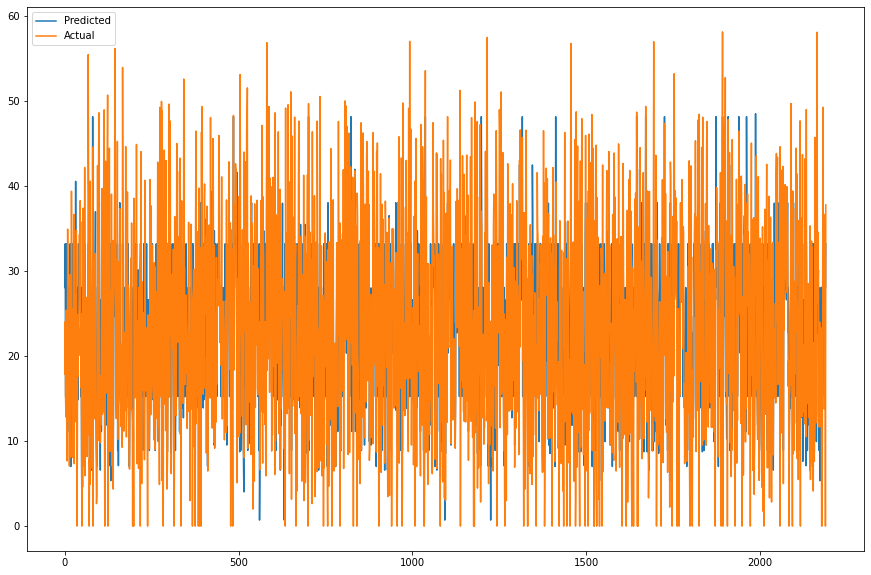

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

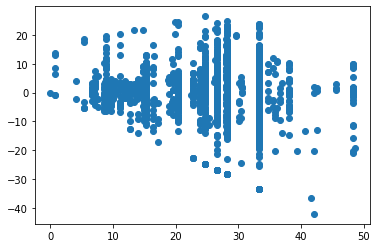

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

**RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.989411747132341
MSE : 1.630492246384248
RMSE : 1.2769072974904043
MAE : 0.8098695696856141
R2 : 0.989411747132341
Adjusted R2 : 0.9891743645365224


Looks like our r2 score value is 0.98 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.910312133746492
RMSE : 3.5930922801601537
MAE : 2.231356798651116
R2 : 0.9182717852634346
Adjusted R2 : 0.9164394852599992


The r2_score for the test set is 0.91. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

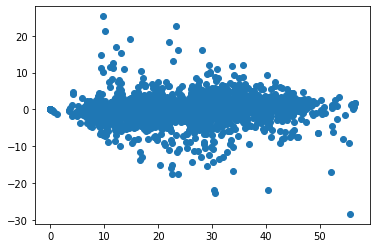

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([3.08216008e-01, 1.56596868e-01, 1.13272424e-02, 1.13904833e-02,
       1.89535259e-02, 2.81354615e-02, 2.88279642e-02, 1.45803257e-03,
       4.65547718e-03, 1.37262412e-02, 2.16264907e-02, 3.01455447e-02,
       2.65993789e-02, 7.99519369e-03, 4.01103861e-03, 1.44027792e-02,
       9.59756472e-04, 1.93707180e-03, 8.95876819e-04, 2.31820190e-04,
       2.52125829e-04, 3.73089203e-04, 1.46251497e-03, 3.52808828e-03,
       1.03974210e-02, 3.13728890e-02, 1.68534293e-02, 1.15060752e-02,
       1.19868170e-02, 9.33531731e-03, 3.68166672e-03, 3.90602170e-03,
       9.03560977e-04, 1.00086726e-02, 3.80566806e-03, 1.49638537e-01,
       2.50766480e-04, 3.99891140e-03, 1.15251911e-03, 1.35513135e-03,
       2.22307537e-03, 5.55186604e-04, 1.43590955e-03, 7.28373709e-04,
       2.70340342e-03, 4.92939596e-03, 7.94307327e-04, 1.87688713e-02])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
35,Functioning_Day_Yes,0.15
25,Hour_18,0.03
5,Solar_Radiation,0.03
6,Rainfall,0.03
12,Hour_5,0.03
11,Hour_4,0.03
10,Hour_3,0.02
26,Hour_19,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

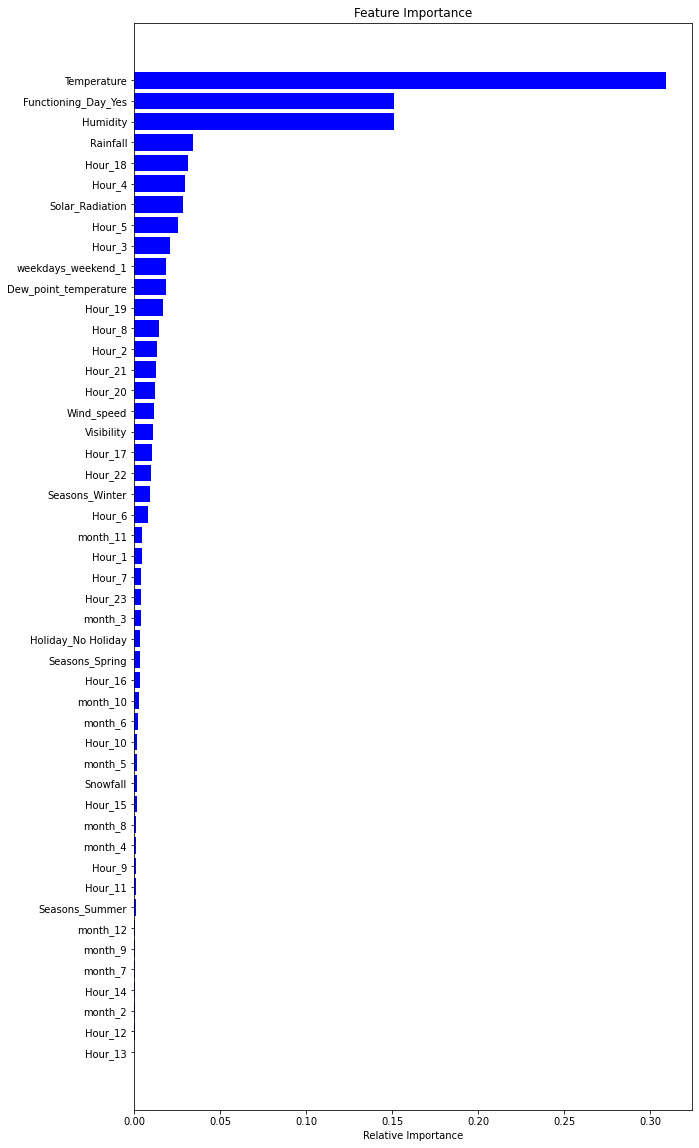

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.444  34.810  5.900   
             1                Lasso regression   7.242  91.458  9.563   
             2                Ridge regression   4.444  34.810  5.900   
             3          Elastic net regression   5.765  57.415  7.577   
             4        Dicision tree regression   5.904  70.778  8.413   
             5        Random forest regression   0.810   1.630  1.277   
             6    Gradient boosting regression   3.254  18.594  4.312   
             7  Gradient Boosting gridsearchcv   1.848   7.398  2.720   
Test set     0               Linear regression   4.373  33.085  5.752   
             1                Lasso regression   7.442  96.685  9.833   
             2                Ridge regression   4.373  33.087  5.752   
             3      Elastic net regression Test  5.846  59.380  7.706   
             4        Dicision tree regression   6.444  84.915  9.215   
             5        Random forest regression   2.231  12.910  3.593   
             6    Gradient boosting regression   3.477  21.311  4.616   
             7  Gradient Boosting gridsearchcv   2.367  12.059  3.473   

                R2_score  Adjusted R2  
Training set 0     0.774         0.77  
             1     0.406         0.39  
             2     0.774         0.77  
             3     0.627         0.62  
             4     0.540         0.53  
             5     0.989         0.99  
             6     0.879         0.88  
             7     0.952         0.95  
Test set     0     0.791         0.79  
             1     0.388         0.37  
             2     0.791         0.79  
             3     0.624         0.62  
             4     0.462         0.45  
             5     0.918         0.92  
             6     0.865         0.86  
             7     0.924         0.92



*    No overfitting is seen.
*   Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.
*   Feature Importance value for Random Forest and Gradient Boost are different.
*    We can deploy this model.
However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

